In [1]:
%%shell
if ! command -v julia 3>&1 > /dev/null
then
    wget -q 'https://julialang-s3.julialang.org/bin/linux/x64/1.7/julia-1.7.2-linux-x86_64.tar.gz' \
        -O /tmp/julia.tar.gz
    tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
    rm /tmp/julia.tar.gz
fi
julia -e 'using Pkg; pkg"add IJulia; precompile;"'
echo 'Done'

┌ Warning: The Pkg REPL mode is intended for interactive use only, and should not be used from scripts. It is recommended to use the functional API instead.
└ @ Pkg.REPLMode /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.7/Pkg/src/REPLMode/REPLMode.jl:377
  Installing known registries into `~/.julia`
    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed VersionParsing ── v1.3.0
   Installed Parsers ───────── v2.5.3
   Installed Conda ─────────── v1.7.0
   Installed ZMQ ───────────── v1.2.2
   Installed JSON ──────────── v0.21.3
   Installed Preferences ───── v1.3.0
   Installed IJulia ────────── v1.24.0
   Installed JLLWrappers ───── v1.4.1
   Installed ZeroMQ_jll ────── v4.3.4+0
   Installed libsodium_jll ─── v1.0.20+0
   Installed SoftGlobalScope ─ v1.1.0
   Installed SnoopPrecompile ─ v1.0.3
   Installed MbedTLS ───────── v1.1.7
  Downloaded artifact: ZeroMQ
  Downloaded artifact: libsodium
    Updating `~/.jul

Sólo nos falta un paso para poder correr Julia nativamente en este notebook:

En el menú superior abriremos: **Edit** > **Notebook settings**
y en la ventana que aparezca elegimermos **Julia 1.7** y damos click en el botón **Save**.

Hecho esto podremos correr nativamente Julia en las celdas siguientes!!!

In [1]:
# Ejemplo codigo Julia de forma nativa en esta celda SIN COMANDOS MAGICOS
A = [1 2 3; 4 1 6; 7 8 1]
inv(A)

3×3 Matrix{Float64}:
 -0.451923   0.211538    0.0865385
  0.365385  -0.192308    0.0576923
  0.240385   0.0576923  -0.0673077

# Animaciones con Julia


Así como en python tenemos módulos que no siempre están incluidos dentro de Colab, en Julia sucede algo similar.

En la siguiente celda instalaremos un paquete para hacer gráficas y que será la base para crear animaciones:

In [2]:
import Pkg
Pkg.add("Plots")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed Libmount_jll ───────────────── v2.35.0+0
   Installed GR_jll ─────────────────────── v0.71.3+0
   Installed LERC_jll ───────────────────── v3.0.0+1
   Installed Opus_jll ───────────────────── v1.3.2+0
   Installed libfdk_aac_jll ─────────────── v2.0.2+0
   Installed JpegTurbo_jll ──────────────── v2.1.2+0
   Installed x265_jll ───────────────────── v3.5.0+0
   Installed LoggingExtras ──────────────── v1.0.0
   Installed Xorg_xkbcomp_jll ───────────── v1.4.2+4
   Installed RelocatableFolders ─────────── v1.0.0
   Installed Grisu ──────────────────────── v1.0.2
   Installed Measures ───────────────────── v0.3.2
   Installed Xorg_xcb_util_wm_jll ───────── v0.4.1+1
   Installed Xorg_xcb_util_image_jll ────── v0.4.0+1
   Installed PlotUtils ──────────────────── v1.3.2
   Installed Formatting ─────────────────── v0.4.2
   Installed Contour ────────────────────── v0.6.2
   Installed Xorg_

Veamos cómo graficar en Julia

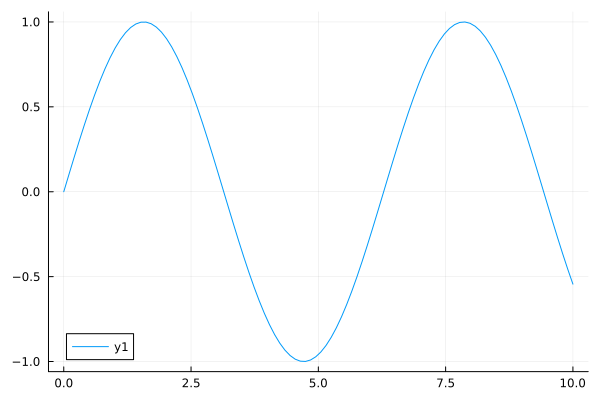

In [3]:
using Plots 

x = range(0, 10, length=100)
y = sin.(x)
plot(x, y)

Una manera de hacer animaciones muy sencillas en Julia es a través del macro **@gif**

En el siguiente ejemplo modificaremos la gráfica para incluirla dentro del macro de animación. Esta animación consiste únicamente en cambiar la amplitud de la función seno dependiendo del cuadro de la animación.

[ Info: Saved animation to /content/tmp.gif


Plots.AnimatedGif("/content/tmp.gif")
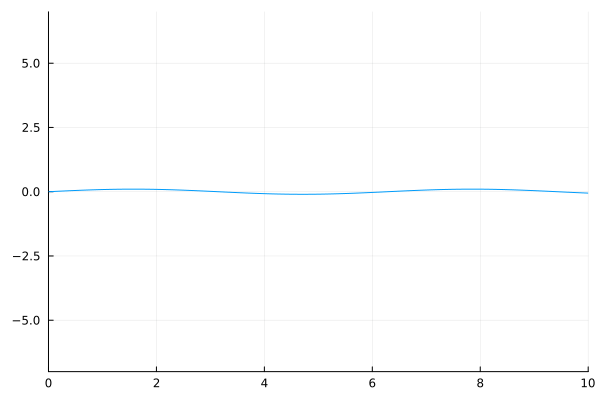

In [15]:
using Plots 

@gif for i in 1:50
    x = range(0, 10, length=100)
    y = (i/10.)*sin.(x)
    plot(x,y,xlims = (0,10),ylims=(-7,7), label="")
end

Una alternativa para hacer animaciones pero una un poco más flexible es a través del macro **@animate**. Este macro lo acompañaremos de la función **gif** con la que especificaremos el nombre del archivo gif donde se guardará la animación y la velocidad en términos de los cuadros por segundo.

Veamos cómo se reescribe la misma animación anterior pero con este macro:

[ Info: Saved animation to /content/sin_wave.gif


Plots.AnimatedGif("/content/sin_wave.gif")
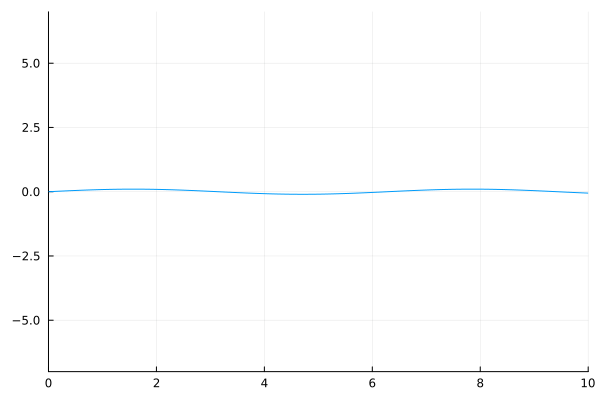

In [17]:
using Plots

anim = @animate for i = 1:50
    x = range(0, 10, length=100)
    y = (i/10.)*sin.(x)
    plot(x,y,xlims = (0,10),ylims=(-7,7), label="")
end
 
gif(anim, "sin_wave.gif", fps = 10)

Veamos otro ejemplo de animación de una curva cicloide.

La curva cicloide es una curva descrita paramétricamente por las siguientes ecuaciones:

$x=r(t-sin(t))$<br>

$y=r(1-cos(t))$



[ Info: Saved animation to /content/cicloide.gif


Plots.AnimatedGif("/content/cicloide.gif")
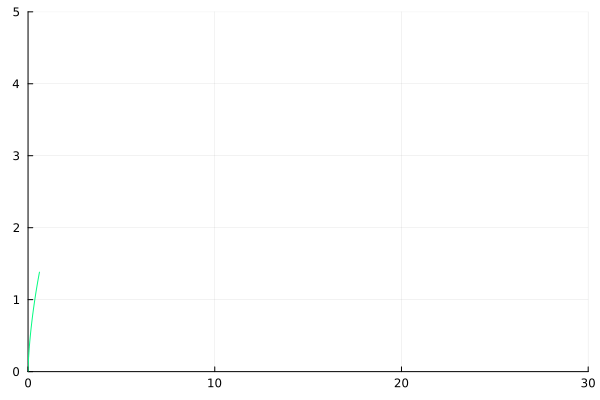

In [41]:
using Plots

N=50
anim = @animate for i = 1:N
    r=2
    t = range(0, i*20*pi/N, length=50*i)
    x=r*(t-sin.(t))
    y = r*(ones(size(t))-cos.(t))
    plot(x,y,xlims = (0,30),ylims = (0,5), label="",color =  "#03fb81")
end
 
gif(anim, "cicloide.gif", fps = 10)

Veamos otro tipo de gráficas que pueden combinarse con estas animaciones:

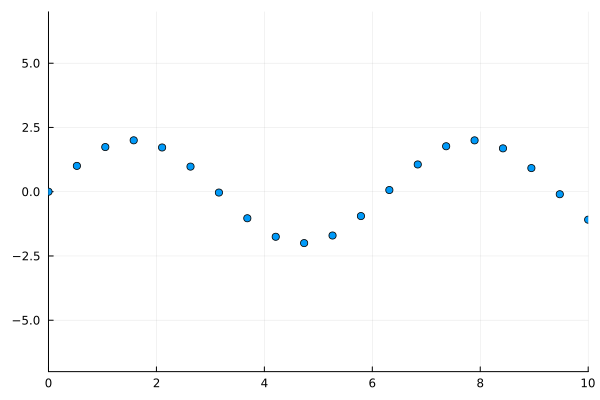

In [44]:
# scatter 
using Plots

x = range(0, 10, length=20)
y = 2*sin.(x)
scatter(x,y,xlims = (0,10),ylims=(-7,7), label="")

Veamos qué tipo de efecto logramos con esta gráfica

[ Info: Saved animation to /content/bouncing_dot.gif


Plots.AnimatedGif("/content/bouncing_dot.gif")
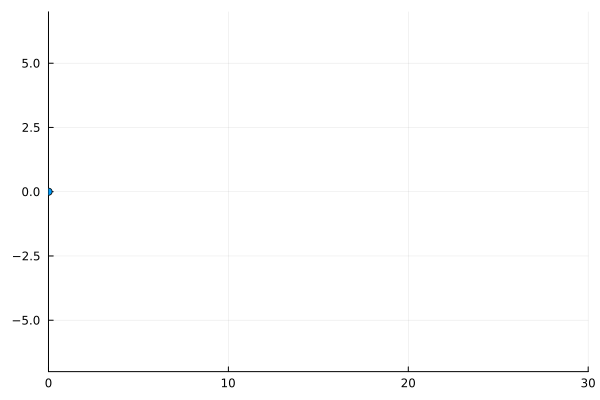

In [57]:
using Plots

anim = @animate for i = 1:50
    x = range(0, 10*2*pi, length=100)
    y = 2*sin.(x)
    scatter([x[i]],[y[i]],xlims = (0,30),ylims=(-7,7), label="")
end
 
gif(anim, "bouncing_dot.gif", fps = 10)

# Algebra lineal numérica


In [4]:
M=[3 8 1; -4 1 1; 1 2 3]

3×3 Matrix{Int64}:
  3  8  1
 -4  1  1
  1  2  3

In [5]:
using LinearAlgebra
lu(M)

LU{Float64, Matrix{Float64}}
L factor:
3×3 Matrix{Float64}:
  1.0   0.0       0.0
 -0.75  1.0       0.0
 -0.25  0.257143  1.0
U factor:
3×3 Matrix{Float64}:
 -4.0  1.0   1.0
  0.0  8.75  1.75
  0.0  0.0   2.8

In [6]:
eigvals(A)

3-element Vector{Float64}:
 -6.214612641961068
 -1.5540265964847833
 10.768639238445843

In [7]:
eigvecs(A)

3×3 Matrix{Float64}:
 -0.175709  -0.766257  -0.344989
 -0.570057   0.587185  -0.589753
  0.802596   0.26089   -0.730188